In [1]:
import numpy as np
import pandas as pd
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import pylab 

In [53]:
def linear_regression(X, y):
    X = pd.get_dummies(X, drop_first = True)._get_numeric_data().values
    y = y.values
    
    intercept_col = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X = np.hstack((intercept_col, X))
    b = np.linalg.inv(X.T@X)@X.T@y
    return b

def rmse(slopes, X_test, y_test):
    X_test = pd.get_dummies(X_test, drop_first = True)._get_numeric_data().values
    intercept_col = np.ones(X_test.shape[0]).reshape(X_test.shape[0],1)
    X_test = np.hstack((intercept_col, X_test))
    
    y_val_pred = X_test @ b
    y_val = y_test.values
    return np.sqrt(((y_val - y_val_pred) ** 2).mean())
    
def train_test_split(frac, X, response = 'Volume Sold (Gallons)'):
    X_train = X.sample(frac = frac)
    X_test = X.drop(X_train.index, axis = 0)
    

    y_train = X_train[response]
    X_train = X_train.drop(['County','Area Name',response], axis = 1)
    
   
    y_test = X_test[response]
    X_test = X_test.drop(['County','Area Name',response], axis = 1)
    
    
    return X_train,X_test, y_train, y_test

def r2(b, X, y):
    X = pd.get_dummies(X, drop_first = True)._get_numeric_data().values
    y = y.values
    intercept_col = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X = np.hstack((intercept_col, X))
    
    ss_tot = ((y - y.mean()) ** 2).sum()
    
    y_val_pred = X @ b
    ss_res = ((y - y_val_pred) ** 2).sum()
    return 1 - (ss_res/ss_tot)

def qqplot(b, X, y):
    X = pd.get_dummies(X, drop_first = True)._get_numeric_data().values
    y = y.values
    intercept_col = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X = np.hstack((intercept_col, X))
    
    y_val_pred = X @ b

    stats.probplot(y - y_val_pred, dist="norm", plot=pylab)
    pylab.show()
def resid_vs_fit(b, X, y):
    X = pd.get_dummies(X, drop_first = True)._get_numeric_data().values
    y = y.values
    intercept_col = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X = np.hstack((intercept_col, X))
    
    y_val_pred = X @ b
    resid = y - y_val_pred
    plt.scatter(y_val_pred, resid)
    plt.show()
    
def aic(b, X, y):
    X = pd.get_dummies(X, drop_first = True)._get_numeric_data().values
    y = y.values
    intercept_col = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X = np.hstack((intercept_col, X))
    y_val_pred = X @ b
    
    ss_tot = ((y - y.mean()) ** 2).sum()
    ss_res = ((y - y_val_pred) ** 2).sum()
    sigmasq = ss_tot / X.shape[0]
    p = X.shape[1]
    
    return (ss_res + 2 *(p * sigmasq)) / ss_tot

def bic(b, X, y):
    X = pd.get_dummies(X, drop_first = True)._get_numeric_data().values
    y = y.values
    intercept_col = np.ones(X.shape[0]).reshape(X.shape[0],1)
    X = np.hstack((intercept_col, X))
    y_val_pred = X @ b
    
    ss_tot = ((y - y.mean()) ** 2).sum()
    ss_res = ((y - y_val_pred) ** 2).sum()
    sigmasq = ss_tot / X.shape[0]
    p = X.shape[1]
    n = X.shape[0]
    
    return (ss_res + (np.log(n) * p * sigmasq)) / ss_tot

In [3]:
df = pd.read_csv("../data/iowaliquor.csv")
df_sample = pd.read_csv("../data/iowa-sample.csv")
df_pop = pd.read_csv("../data/County_Population_in_Iowa_by_Year.csv")


/Users/anishyakkala/Library/Python/3.6/lib/python/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_raw_employment = pd.read_csv("../data/Iowa_Quarterly_Census_of_Employment_and_Wage_data__Statewide_and_County_.csv")
df_raw_employment.fillna(0)

,Year,Quarter,Area Type,Area Name,Industry,Description,Locations,Month 1,Month 2,Month 3,Average Emp,Wages,Average Wage
0,2011,1,Statewide,Statewide,11,"Agriculture, Forestry, Fishing & Hunt",1921,14343.0,14504.0,14895.0,14581.0,1.204824e+08,8263.0
1,2011,1,Statewide,Statewide,21,"Mining, Quarrying, & Oil & Gas Extrac",186,1638.0,1811.0,1818.0,1756.0,1.679560e+07,9567.0
2,2011,1,Statewide,Statewide,22,Utilities,449,8330.0,8288.0,8328.0,8315.0,1.593543e+08,19164.0
3,2011,1,Statewide,Statewide,23,Construction,8994,52324.0,51154.0,53629.0,52369.0,5.506093e+08,10514.0
4,2011,1,Statewide,Statewide,31,Manufacturing,3985,201803.0,202120.0,203641.0,202521.0,2.454029e+09,12117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500575,2020,1,County,Unspecified County,924,Administration of Environmental,0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
500576,2020,1,County,Unspecified County,925,Administration of Housing Program,0,0.0,0.0,0.0,0.0,0.000000e+00,0.0
500577,2020,1,County,Unspecified County,926,Administration of Economic Progra,1,0.0,0.0,0.0,0.0,0.000000e+00,0.0
500578,2020,1,County,Unspecified County,927,Space Research & Technology,0,0.0,0.0,0.0,0.0,0.000000e+00,0.0


In [5]:
df_employement = pd.pivot_table(df_raw_employment,
               index = ["Year", "Quarter", "Area Name"],
               values = ["Average Emp", "Wages"],
               aggfunc = np.sum
              ).reset_index()

df_employement["Area Name"] = df_employement["Area Name"].str.lower()

In [6]:
df_employement["Year"] = df_employement["Year"].astype('str')
df_employement["Quarter"] = df_employement["Quarter"].astype('str')

In [7]:
df["County"] = df["County"].str.lower()

In [8]:
df["Year"] = pd.DatetimeIndex(df['Date']).year
df["Quarter"] = pd.DatetimeIndex(df['Date']).quarter

In [9]:
df["Year"] = df["Year"].astype('str')
df["Quarter"] = df["Quarter"].astype('str')
df["Pack"] = df["Pack"].astype('str')

In [10]:
GROUP_VARIABLES = ['County','Year','Quarter']
NUMERIC_VARIABLES = ['Bottle Volume (ml)','State Bottle Cost', 'State Bottle Retail',
                     'Bottles Sold','Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)']

df_agg =  pd.pivot_table(df, 
                        index = GROUP_VARIABLES,
                        values = NUMERIC_VARIABLES,
                        aggfunc = np.sum).reset_index().merge(df_employement, 'inner', left_on = ['Year','County', 'Quarter'], right_on = ['Year','Area Name', 'Quarter']).dropna()

In [11]:
df_pop["Year"] = df_pop["Year"].str[-4:]

In [12]:
df_pop["County"] = df_pop["County"].str.replace(" County","").str.lower()

In [13]:
df_agg = df_agg.merge(df_pop[["Year","County","Population"]],
             'inner',
             left_on = ['Year', 'County'],
             right_on = ['Year', 'County'])

In [15]:
df_agg["Sale (Dollars) Per Capita"] = df_agg["Sale (Dollars)"] / df_agg["Population"]

In [16]:
df_agg["Wages Per Capita"] = df_agg["Wages"]/ df_agg["Population"]
df_agg["Average Emp Per Capita"] = df_agg["Average Emp"] / df_agg["Population"]

In [17]:
df_agg

,County,Year,Quarter,Bottle Volume (ml),Bottles Sold,Sale (Dollars),State Bottle Cost,State Bottle Retail,Volume Sold (Gallons),Volume Sold (Liters),Area Name,Average Emp,Wages,Population,Sale (Dollars) Per Capita,Wages Per Capita,Average Emp Per Capita
0,adair,2012,1,965450,7107,78426.57,7751.07,11660.15,1830.92,6932.89,adair,3941.0,25331409.0,7468,10.501683,3391.993706,0.527718
1,adair,2012,2,1235100,9492,110003.28,10505.50,15816.48,2356.82,8925.63,adair,4377.0,28929023.0,7468,14.729952,3873.730986,0.586101
2,adair,2012,3,1135625,8489,101681.95,9685.16,14563.81,2150.68,8144.73,adair,4317.0,29765410.0,7468,13.615687,3985.727102,0.578066
3,adair,2012,4,1166300,9806,123579.68,10012.10,15093.50,2454.28,9293.77,adair,4261.0,30926473.0,7468,16.547895,4141.198848,0.570568
4,adair,2013,1,855000,7129,82411.70,7072.67,10629.71,1786.17,6763.87,adair,4070.0,27122098.0,7387,11.156315,3671.598484,0.550968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,wright,2017,4,1858075,17357,206423.62,17914.27,26875.57,4313.38,16328.04,wright,9610.0,100858697.0,12749,16.191358,7911.106518,0.753785
2732,wright,2018,1,1759350,15173,169949.23,16151.12,24230.59,3545.80,13423.72,wright,9354.0,91390520.0,12690,13.392374,7201.774626,0.737116
2733,wright,2018,2,1901400,16866,194215.96,17637.84,26460.80,4148.87,15706.04,wright,9682.0,100203579.0,12690,15.304646,7896.263121,0.762963
2734,wright,2018,3,1984075,18080,198284.28,18417.20,27629.88,4117.05,15610.49,wright,9687.0,97026549.0,12690,15.625239,7645.906147,0.763357


In [46]:
DEP_VARS = ["Year","Quarter","Average Emp Per Capita", "Wages Per Capita"]

In [47]:
X_train,X_test, y_train, y_test = train_test_split(.5, df_agg,"Sale (Dollars) Per Capita")

In [48]:
b = linear_regression(X_train[DEP_VARS], y_train)

In [49]:
pd.get_dummies(X_train[DEP_VARS],drop_first = True)._get_numeric_data()

,Average Emp Per Capita,Wages Per Capita,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Quarter_2,Quarter_3,Quarter_4
2111,1.238081,15380.516698,0,1,0,0,0,0,0,1,0
2687,0.372680,2946.548137,1,0,0,0,0,0,0,0,1
1892,0.693291,5863.581988,1,0,0,0,0,0,0,1,0
688,0.296795,2178.164252,1,0,0,0,0,0,0,1,0
559,0.973245,8961.549890,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1986,0.595364,5742.995199,0,0,0,0,0,1,1,0,0
362,1.095852,10153.009882,1,0,0,0,0,0,0,0,1
848,1.207457,13182.594162,0,0,0,0,0,1,0,1,0
2438,0.396157,3141.136111,0,1,0,0,0,0,0,1,0


In [50]:
r2(b, X_train[DEP_VARS], y_train)

0.5561950598412853

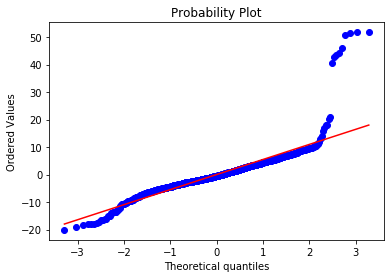

In [51]:
qqplot(b, X_train[DEP_VARS], y_train)

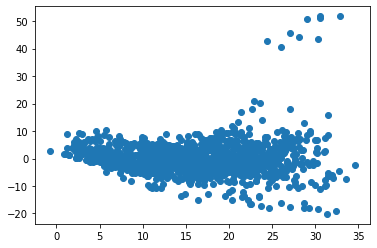

In [52]:
resid_vs_fit(b, X_train[DEP_VARS], y_train)